In [1]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Heat Equation with time dependence

$\begin{aligned}
\frac{\partial u}{\partial t} &=\nabla^{2} u+f & & \text { in } \Omega \times(0, T] \\
u &=u_{\mathrm{D}} & & \text { on } \partial \Omega \times(0, T] \\
u &=u_{0} & & \text { at } t=0
\end{aligned}$

where, $ f(x, y, t)=\beta-2-2 \alpha$

## Set parameters


+ Time = 2
+ Steps = 10
+ $\alpha = 3$
+ $\beta = 1.2$

In [11]:
T = 2.0            # final time
num_steps = 10     # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta

## Create mesh and boundary condition

$u_{\mathrm{D}}(x, y, t)=1+x^{2}+\alpha y^{2}+\beta t$

In [4]:
# Create mesh and define function space
nx = ny = 80
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t', degree=2, alpha=alpha, beta=beta, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

## Initial value and variational form

Discretization

$$\left(\frac{\partial u}{\partial t}\right)^{n+1}=\nabla^{2} u^{n+1}+f^{n+1}$$


$$\frac{u^{n+1}-u^{n}}{\Delta t}=\nabla^{2} u^{n+1}+f^{n+1}$$

Using the initial condition $u_0$:

$$\begin{aligned}
u^{0} &=u_{0} \\
u^{n+1}-\Delta t \nabla^{2} u^{n+1} &=u^{n}+\Delta t f^{n+1}, \quad n=0,1,2, \ldots
\end{aligned}$$

Now, all terms to one side of the equation:


$$u^{n+1}-\Delta t \nabla^{2} u^{n+1}-u^{n}-\Delta t f^{n+1}=0, \quad n=0,1,2, \ldots$$

Writting in the standard notation:

$$a(u, v)=L_{n+1}(v)$$

where

$$\begin{aligned}
a(u, v) &=\int_{\Omega}(u v+\Delta t \nabla u \cdot \nabla v) \mathrm{d} x \\
L_{n+1}(v) &=\int_{\Omega}\left(u^{n}+\Delta t f^{n+1}\right) v \mathrm{d} x
\end{aligned}$$

Finally, using the abstract formulation:

$$F_{n+1}(u ; v)=0$$

where

$$F_{n+1}(u ; v)=\int_{\Omega}\left(u v+\Delta t \nabla u \cdot \nabla v-\left(u^{n}+\Delta t f^{n+1}\right) v\right) \mathrm{d} x$$

We need approximate the initial condition into a variational problem:

$$a_{0}(u, v)=L_{0}(v)$$

with

$$\begin{aligned}
a_{0}(u, v) &=\int_{\Omega} u v \mathrm{d} x \\
L_{0}(v) &=\int_{\Omega} u_{0} v \mathrm{d} x
\end{aligned}$$

In [5]:
# Define initial value
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx #Abstract formulation
a, L = lhs(F), rhs(F)

## Iterate at the time

time = 2.00 
 error = 0.86


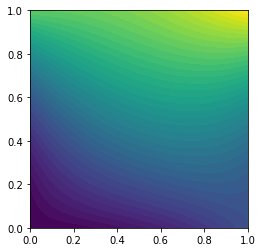

time = 4.00 
 error = 0.0232


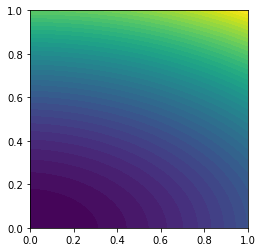

time = 6.00 
 error = 0.000583


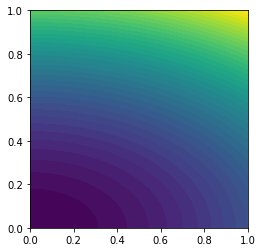

time = 8.00 
 error = 1.45e-05


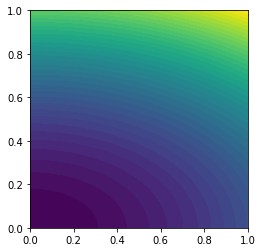

time = 10.00 
 error = 3.57e-07


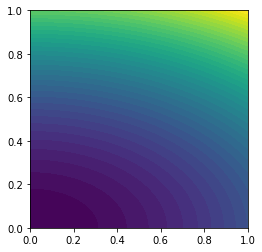

time = 12.00 
 error = 8.83e-09


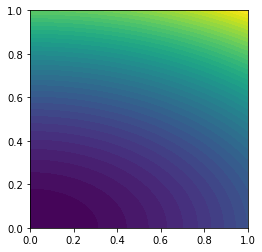

time = 14.00 
 error = 2.22e-10


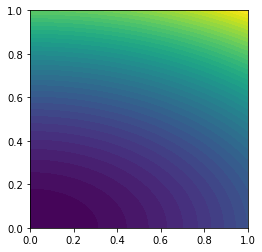

time = 16.00 
 error = 9.96e-12


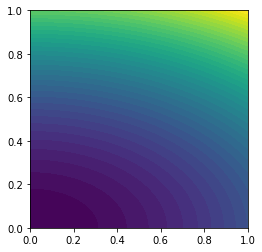

time = 18.00 
 error = 5.27e-12


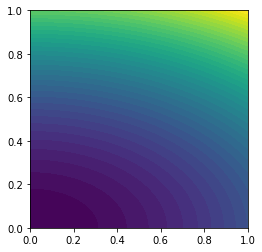

time = 20.00 
 error = 5.67e-12


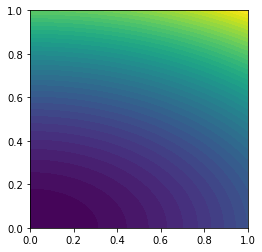

In [10]:
# Time-stepping
u = Function(V)
t = 0

for n in range(num_steps):
    # Update current time
    t = round(t + dt, 2)
    u_D.t = t #Update time parameter at the boundary

    # Compute solution
    solve(a == L, u, bc)  
    
    # Compute error at vertices
    u_e = interpolate(u_D, V)
    error = np.abs(u_e.vector() - u.vector()).max()
    print(' time = %.2f \n error = %.3g' % (t, error))

    # Update previous solution
    u_n.assign(u)
    plot(u)
    plt.show()

In [7]:
@interact
def show_solution_time(t = (dt,T,dt)):
    u_D.t = t
    solve(a == L, u, bc)
    u_n.assign(u)
    return plot(u)

interactive(children=(FloatSlider(value=10.0, description='t', max=20.0, min=2.0, step=2.0), Output()), _dom_c…